In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import kruskal

In [2]:
!gdown 1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f

Downloading...
From: https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
To: /content/aerofit.csv
100% 7.46k/7.46k [00:00<00:00, 19.9MB/s]


In [4]:
df = pd.read_csv('/content/aerofit.csv')

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

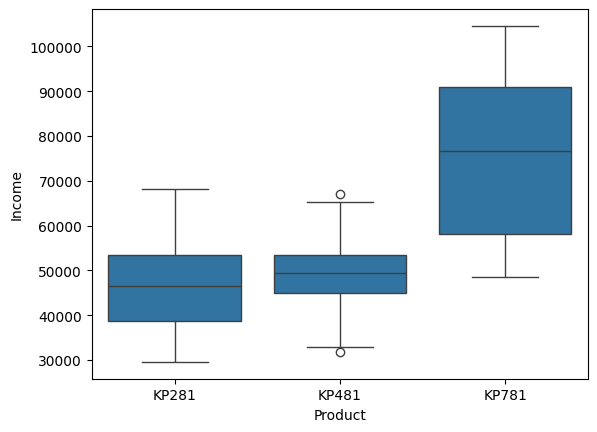

In [7]:
sns.boxplot(x = "Product", y = "Income", data = df)

In [8]:
df["random_group"] = np.random.choice(["g1", "g2", "g3"], size = len(df))

In [9]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g1
3,KP281,19,Male,12,Single,3,3,32973,85,g2
4,KP281,20,Male,13,Partnered,4,2,35247,47,g3


<Axes: xlabel='random_group', ylabel='Income'>

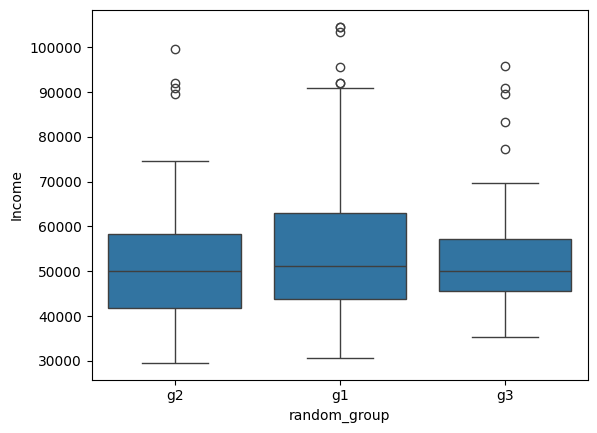

In [10]:
sns.boxplot(x = "random_group", y = "Income", data = df)

In [11]:
#setup1:

income_g1 = df[ df["random_group"] == "g1"]["Income"]
income_g2 = df[ df["random_group"] == "g2"]["Income"]
income_g3 = df[ df["random_group"] == "g3"]["Income"]

In [12]:
income_g1.mean()

56332.49206349206

In [13]:
income_g2.mean()

51931.8125

In [14]:
income_g3.mean()

52772.47169811321

In [16]:
f_oneway(income_g1, income_g2, income_g3)

F_onewayResult(statistic=1.2554762969053717, pvalue=0.2874649240495192)

In [17]:
# H0: All groups have same mean
# Ha: One or more groups have different mean

f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


In [18]:
#Conclusion for above: just by chance factor

<Axes: xlabel='Product', ylabel='Income'>

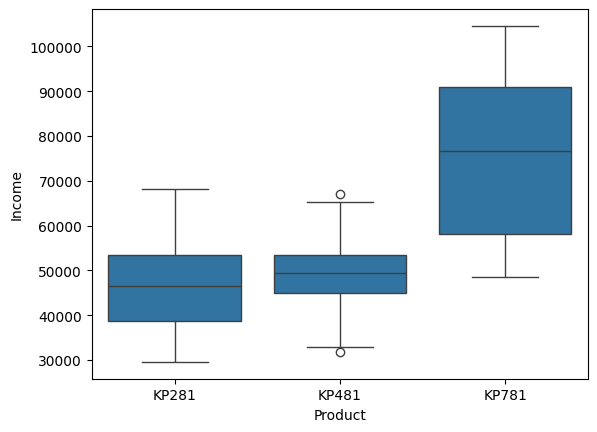

In [19]:
sns.boxplot(x = "Product", y = "Income", data = df)

In [20]:
income_kp281 = df[df["Product"] == "KP281"]["Income"]
income_kp481 = df[df["Product"] == "KP481"]["Income"]
income_kp781 = df[df["Product"] == "KP781"]["Income"]

In [21]:
income_kp281.mean()

46418.025

In [22]:
income_kp481.mean()

48973.65

In [23]:
income_kp781.mean()

75441.575

In [24]:
#H0: All groups have same mean
#Ha: one ore more groups have diff mean

In [25]:
f_oneway(income_kp281, income_kp481, income_kp781)

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [26]:
# H0: All groups have same mean
# Ha: One or more groups have different mean

f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0


In [27]:
#Implement above with t-test

In [30]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)

if p_value < 0.05:
  print("Rject H0")
else:
  print("Fail to reject H0")

Fail to reject H0


In [31]:
t_stat, p_value = ttest_ind(income_kp481, income_kp781)

if p_value < 0.05:
  print("Rject H0")
else:
  print("Fail to reject H0")

Rject H0


In [32]:
t_stat, p_value = ttest_ind(income_kp281, income_kp781)

if p_value < 0.05:
  print("Rject H0")
else:
  print("Fail to reject H0")

Rject H0


In [34]:
kruskal(income_kp281, income_kp481, income_kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

In [35]:
#Normality test

In [36]:
!gdown 1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb

Downloading...
From: https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
To: /content/weight-height.csv
100% 428k/428k [00:00<00:00, 23.7MB/s]


In [37]:
path = '/content/weight-height.csv'
df_hw = pd.read_csv(path)

In [38]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [39]:
height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

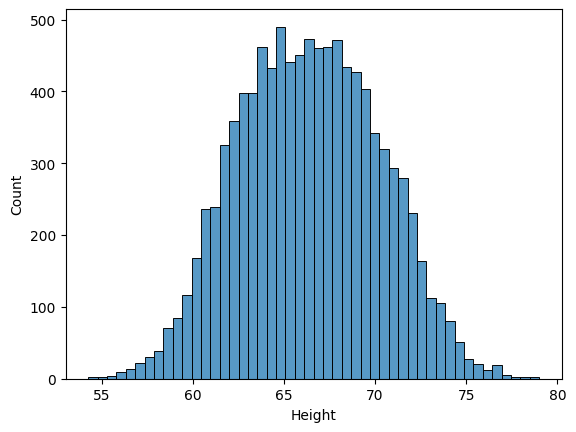

In [40]:
sns.histplot(height)

In [42]:
from statsmodels.graphics.gofplots import qqplot

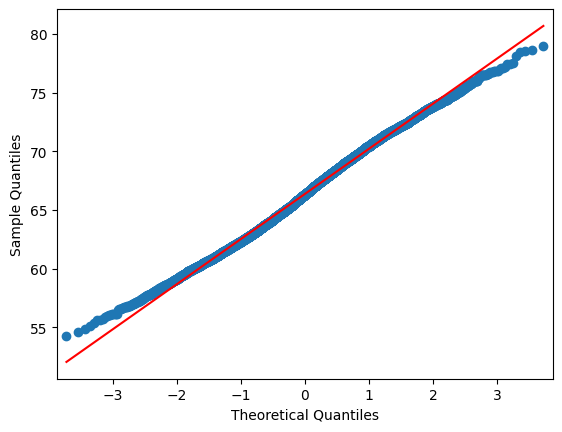

In [43]:
qqplot(height, line = "s")
plt.show()

In [44]:
!gdown 1v48RRtiivufSX4ewrMaxsADK73GnN2kI

Downloading...
From: https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
To: /content/waiting_time.csv
100% 1.66M/1.66M [00:00<00:00, 20.9MB/s]


In [45]:
path = '/content/waiting_time.csv'
df_wt = pd.read_csv(path)

In [46]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

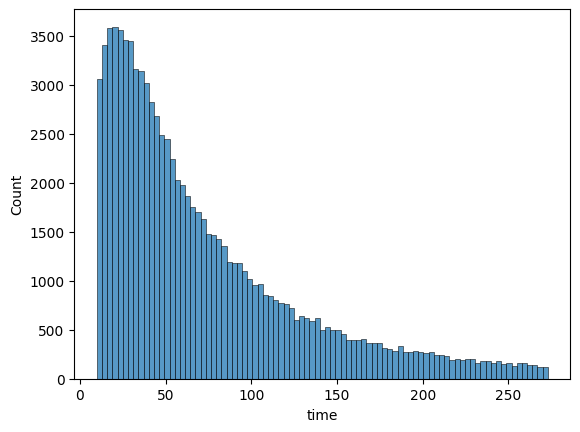

In [47]:
sns.histplot(df_wt["time"])

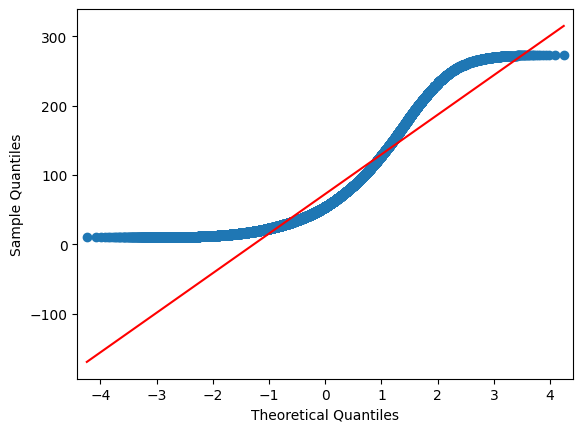

In [48]:
qqplot(df_wt["time"], line = "s")
plt.show()

In [49]:
#shapiro wilk's test #(50-200)

In [50]:
np.random.sample(42)
height_subset = height.sample(100)

In [53]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.17693749070167542


In [54]:
#H0: Data is Gaussian
#Ha: Data is not Gaussian

if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

Failed to Reject H0


In [55]:
#Levene's test

In [56]:
df_hw.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


<Axes: xlabel='Height', ylabel='Count'>

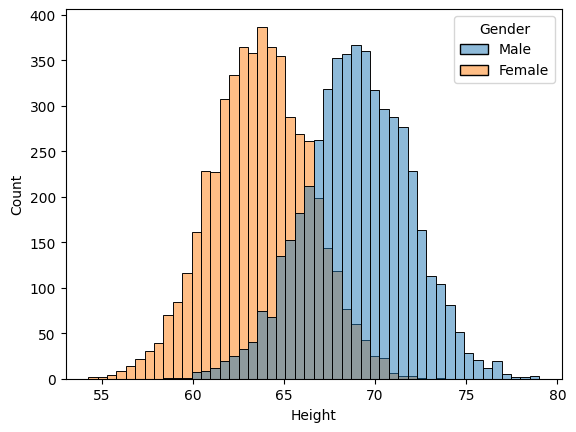

In [57]:
sns.histplot(data = df_hw, x = "Height", hue = "Gender")

In [58]:
height_men = df_hw[df_hw["Gender"] == "Male"]["Height"]
height_women = df_hw[df_hw["Gender"] == "Female"]["Height"]

In [59]:
height_men.var()

8.198843252520467

In [60]:
height_women.var()

7.2699474936701245

In [62]:
from scipy.stats import levene

#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(height_men, height_women)
print(p_value)

if p_value < 0.05:
  print("Reject H0: Variances are not equal")

0.0004586349895436178
Reject H0: Variances are not equal


The United States is divided into four regions: Northeast, Midwest, South and West regions.

Independent random samples of households in these regions yielded the data on last year’s energy consumptions.

a = [13, 8, 11, 12, 11]
b = [15, 10, 16, 11, 13, 10]
c = [5, 11, 9, 5]
d = [8, 10, 6, 5, 7]

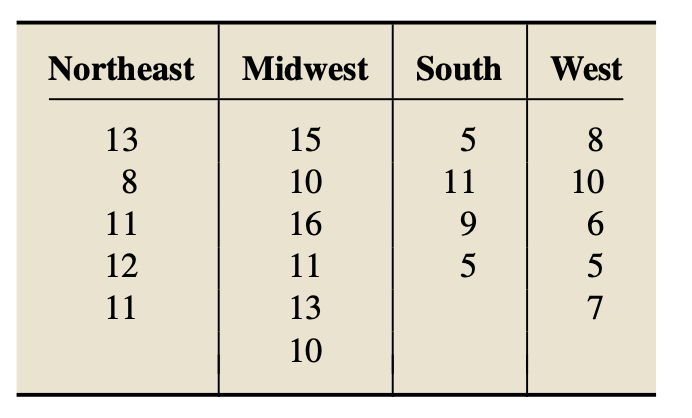

At a 5% significance level, does the data provide sufficient evidence to conclude that there is a difference in last year’s mean energy consumption
by households among the four regions?

Choose the correct option below :

In [9]:
a = [13, 8, 11, 12, 11] 
b = [15, 10, 16, 11, 13, 10] 
c = [5, 11, 9, 5] 
d = [8, 10, 6, 5, 7]
alpha=0.05

H0="Equal in last year's energy consumption"
H1="There was diffrence, not equal in last year's energy consumption"

f_stats, p_value=f_oneway(a,b,c,d)
print(p_value)
if p_value<0.05: 
    print("reject null hyp", H1)
else: 
    print("Fail to reject null hyp", H0)

0.0049302919205628576
reject null hyp There was diffrence, not equal in last year's energy consumption


There is a website, "www.goodreads.com" where people can leave their reviews about a book and rate them on a scale of 1 to 5 stars.
The following table gives the number of pages of a random sample of books with different ratings, as listed on the site:\
    
one_star = [382, 391, 335, 368, 400, 372]
two_star = [560, 343, 512, 329, 391, 367]
three_star = [384, 458, 409, 309, 374, 459]
four_star = [325, 390, 304, 240, 306, 169]
five_star = [360, 298, 272, 368, 320, 326]

At a 1% significance level, does the data provide sufficient evidence to conclude that there is a difference in the mean number of pages among books in these five rating groups?

Choose the correct option below :

In [8]:
one_star = [382, 391, 335, 368, 400, 372]
two_star = [560, 343, 512, 329, 391, 367]
three_star = [384, 458, 409, 309, 374, 459]
four_star = [325, 390, 304, 240, 306, 169]
five_star = [360, 298, 272, 368, 320, 326]

alpha=0.01

H0="Number of pages in the books belonging to different rating groups is same"
H1="Number of pages in the books belonging to different rating groups is different"


f_stats, p_value=f_oneway(one_star,two_star,three_star,four_star, five_star)

print(p_value)
if p_value<alpha: 
    print(f"reject null hyp {p_value}", H1)
else: 
    print(f"Fail to reject null hyp {p_value}", H0)

0.009362001936328837
reject null hyp 0.009362001936328837 Number of pages in the books belonging to different rating groups is different


Consumer Reports publishes reviews and comparisons of products based on results from its laboratory.

Data from their website gave the following table for battery lives in hours, for samples of smartphones made by four different mobile companies.

Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]

Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]

Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]

Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

At a 2% significance level, does the data provide sufficient evidence to conclude that there is a significant difference in the mean battery life, among the four brands?

And, if significant, then perform pairwise T-tests to identify which pairs of smartphone brands offer a different mean battery life.

Choose the correct option below :

In [10]:
Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

H0="Brand_A mean==Brand_B mean"
H1="Brand_A mean!=Brand_B mean"
t_stat, p_value=ttest_ind(Brand_A, Brand_B, alternative='two-sided')
alpha=0.02
print(p_value)

if p_value<alpha: 
    print(f"reject null hyp {p_value}", H1)
else: 
    print(f"Fail to reject null hyp {p_value}", H0)

0.005464761718691163
reject null hyp 0.005464761718691163 Brand_A mean!=Brand_B mean


In [11]:
Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

H0="Brand_D mean==Brand_C mean"
H1="Brand_D mean!=Brand_C mean"

t_stat, p_value=ttest_ind(Brand_C, Brand_D, alternative='two-sided')
alpha=0.02
print(p_value)

if p_value<alpha: 
    print(f"reject null hyp {p_value}", H1)
else: 
    print(f"Fail to reject null hyp {p_value}", H0)

8.33672049161488e-14
reject null hyp 8.33672049161488e-14 Brand_D mean!=Brand_C mean


In [12]:
Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

H0="Brand_A mean==Brand_D mean"
H1="Brand_A mean!=Brand_D mean"

t_stat, p_value=ttest_ind(Brand_A, Brand_D, alternative='two-sided')
alpha=0.02
print(p_value)

if p_value<alpha: 
    print(f"reject null hyp {p_value}", H1)
else: 
    print(f"Fail to reject null hyp {p_value}", H0)

3.271164766368406e-05
reject null hyp 3.271164766368406e-05 Brand_A mean!=Brand_D mean


Mark the correct assumptions of ANOVA.

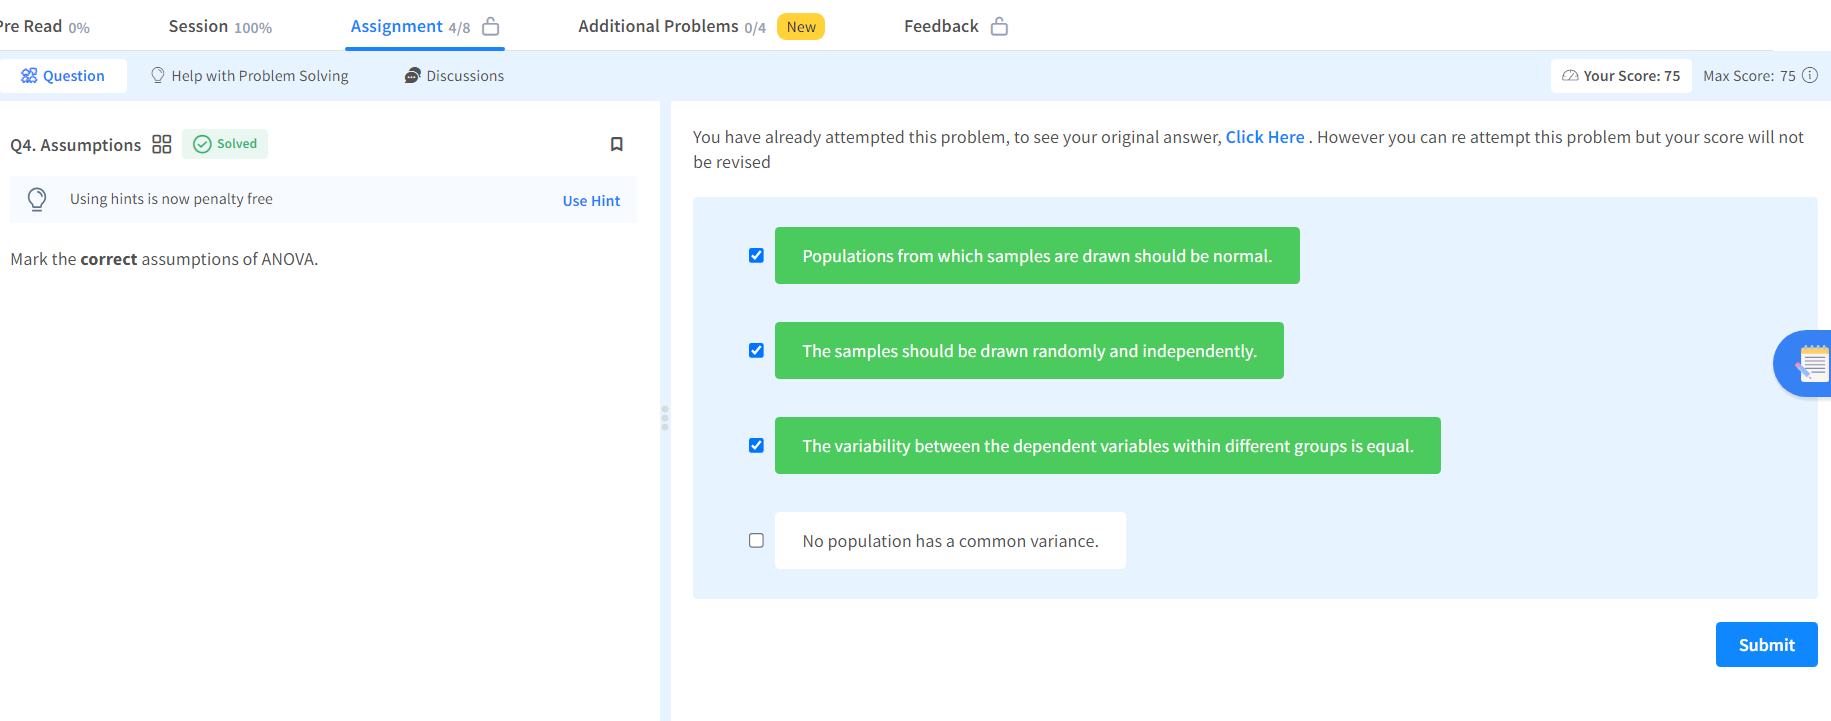

A software development team is comparing the performance of three different algorithms for sorting large datasets.

The team collects the execution time (in milliseconds) for each algorithm on 20 different datasets:
    
algorithm_A = np.array([23, 25, 22, 27, 28, 24, 26, 29, 21, 30, 25, 43, 26, 28, 24, 22, 27, 46, 25, 29]) 

algorithm_B = np.array([31, 28, 29, 32, 30, 33, 27, 28, 32, 30, 31, 29, 30, 48, 33, 31, 29, 30, 32, 31]) 

algorithm_C = np.array([45, 43, 23, 49, 49, 8, 21, 20, 42, 40, 28, 46, 44, 37, 44, 38, 42, 34, 42, 40])

Check for the assumptions of One-way ANOVA & decide the appropriate test to determine 

if there is a statistically significant difference in the execution times of the three algorithms at a 95% confidence level.

In [25]:
import numpy as np
from scipy.stats import shapiro

algorithm_A = np.array([23, 25, 22, 27, 28, 24, 26, 29, 21, 30, 25, 43, 26, 28, 24, 22, 27, 46, 25, 29])
algorithm_B = np.array([31, 28, 29, 32, 30, 33, 27, 28, 32, 30, 31, 29, 30, 48, 33, 31, 29, 30, 32, 31])
algorithm_C = np.array([45, 43, 23, 49, 49, 8, 21, 20, 42, 40, 28, 46, 44, 37, 44, 38, 42, 34, 42, 40])

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro-Wilk test for Algorithm A
stat, pvalue_a = shapiro(algorithm_A)
# Shapiro-Wilk test for Algorithm B
stat, pvalue_b = shapiro(algorithm_B)
# Shapiro-Wilk test for Algorithm C
stat, pvalue_c = shapiro(algorithm_C)

alpha = 0.05

print("Shaprio results:")
print("algorithm_A:", pvalue_a,"; Not normally distributed" if pvalue_a <= alpha else " ; Normally distributed")
print("algorithm_B:", pvalue_b,"; Not Normally distributed" if pvalue_b <= alpha else " ; Normally distributed")
print("algorithm_C:", pvalue_c,"; Not Normally distributed" if pvalue_c <= alpha else " ; Normally distributed")
print()
from scipy.stats import levene

# H0: Variances are equal
# Ha: Variances are not equal

# Levene test
statistic, pvalue_levene = levene(algorithm_A, algorithm_B, algorithm_C)
print('Levene test p-value:',pvalue_levene)

if p_value < 0.05:
    print("Variances are not equal")
else:
    print("Variances are equal")
    
# Output:
# Shaprio results:
# algorithm_A: 0.00012557873560581356 ; Not normally distributed
# algorithm_B: 3.6959927456337027e-06 ; Not Normally distributed
# algorithm_C: 0.007560277823358774 ; Not Normally distributed

# Levene test p-value: 0.018090536773928783
# Variances are not equal


#Since we can see that data does not follow assumptions of One Way ANOVA, we will need to perform Kruskal-Wallis test in order to make conclusions.

# Code:

from scipy.stats import kruskal
# Null Hypothesis (H0): The medians of the execution times are the same for all three algorithms.
# Alternative Hypothesis (H1): At least one of the medians of the execution times is different among the three algorithms.

stat, p_value = kruskal(algorithm_A, algorithm_B, algorithm_C)

print("test statistic:",stat)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject H0")
    print("At least one of the medians of the execution times is different among the three algorithms")
else:
    print("Fail to reject H0")
    print("The medians of the execution times are the same for all three algorithms.")

    
# Output:
# test statistic: 15.347265483520486
# p_value: 0.00046492579685792804
# Reject H0
# At least one of the medians of the execution times is different among the three algorithms

Shaprio results:
algorithm_A: 0.0001255788520211354 ; Not normally distributed
algorithm_B: 3.6959761473553954e-06 ; Not Normally distributed
algorithm_C: 0.007560218218713999 ; Not Normally distributed

Levene test p-value: 0.018090536773928783
Variances are not equal
test statistic: 15.347265483520486
p_value: 0.00046492579685792804
Reject H0
At least one of the medians of the execution times is different among the three algorithms


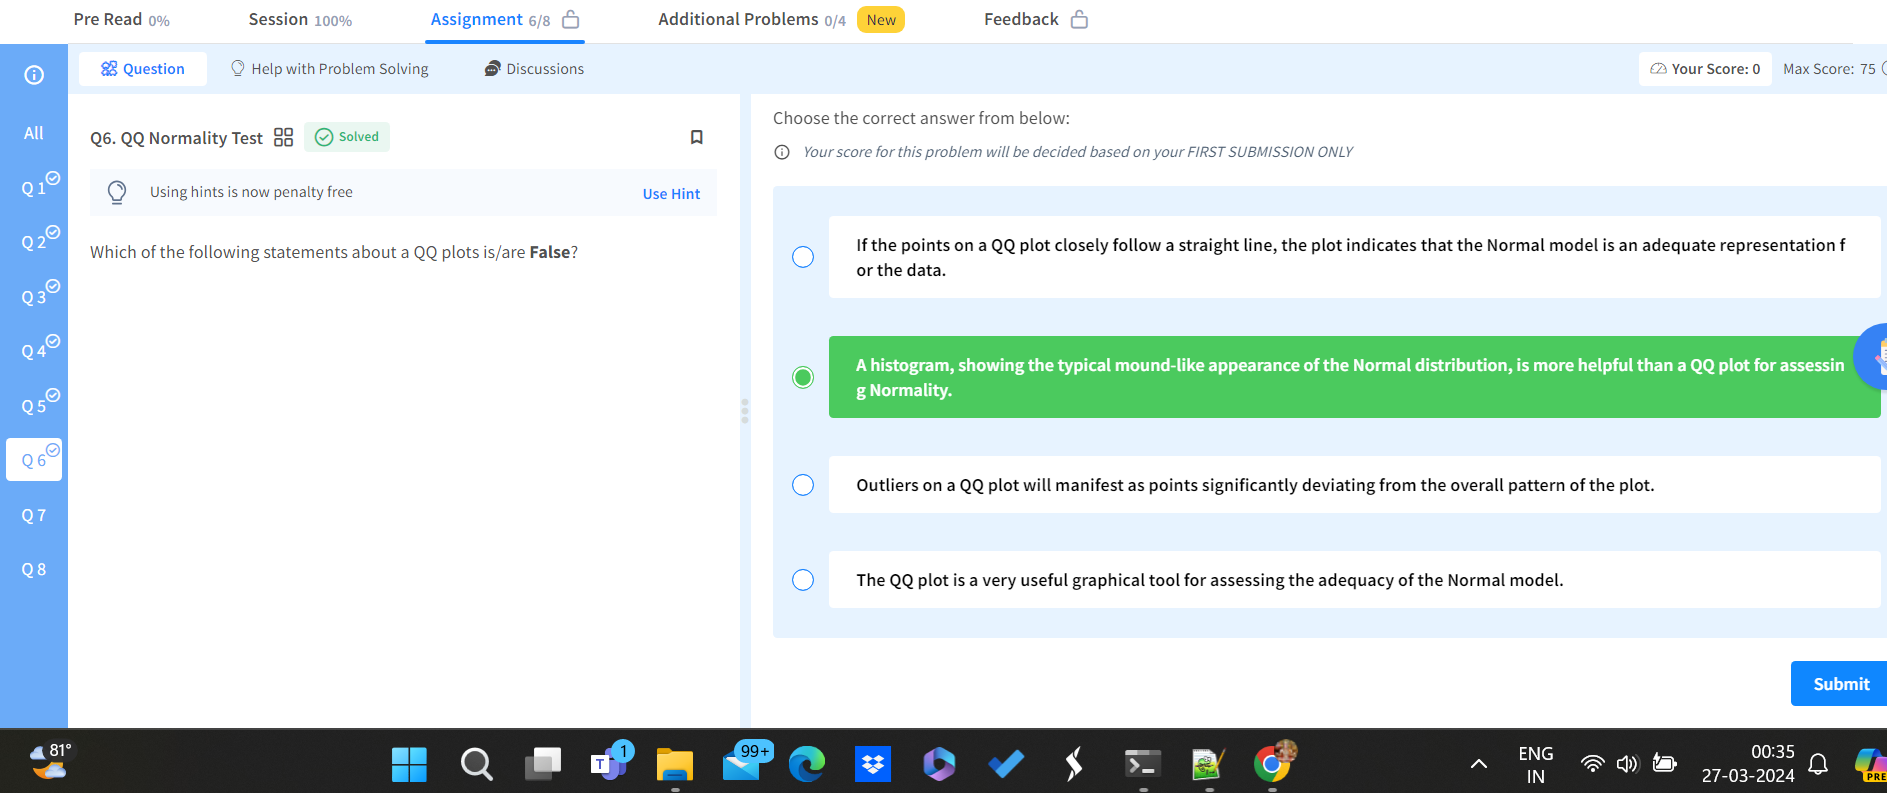

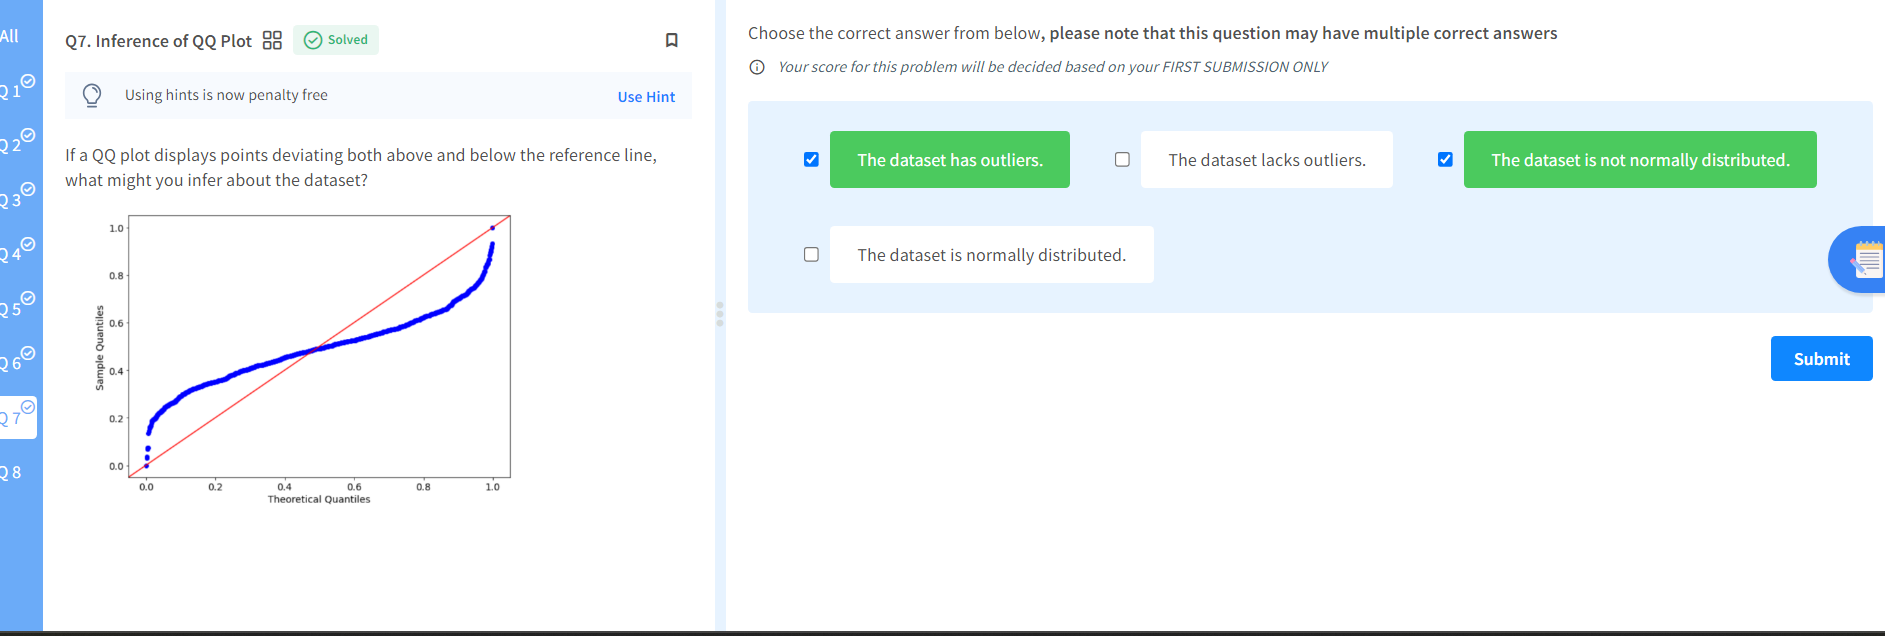

The pharmaceutical company collected data on the treatment effects (values in corresponding units) of two drug formulations (Group A and Group B) in a study

group_a_effects = [1.5, 1.8, 1.2, 1.6, 1.7]

group_b_effects = [1.4, 1.9, 1.3, 1.5, 1.8]

The researchers want to assess whether the variances of the treatment effects are significantly different among the two groups.

Perform the appropriate test with a 90% confidence level, calculate the p-value and interpret the conclusions.

In [29]:
group_a_effects = [1.5, 1.8, 1.2, 1.6, 1.7]

group_b_effects = [1.4, 1.9, 1.3, 1.5, 1.8]

H0="The variances of the treatment effects are equal"
H1="The variances of the treatment effects are not equal"

from scipy.stats import levene

# Levene test
statistic, pvalue_levene = levene(group_a_effects, group_b_effects)
print('Levene test p-value:',pvalue_levene)

if pvalue_levene < 0.1:
    print(H1)
else:
    print("Fail to reject H0", H0)

Levene test p-value: 0.693799838016959
Fail to reject H0 The variances of the treatment effects are equal


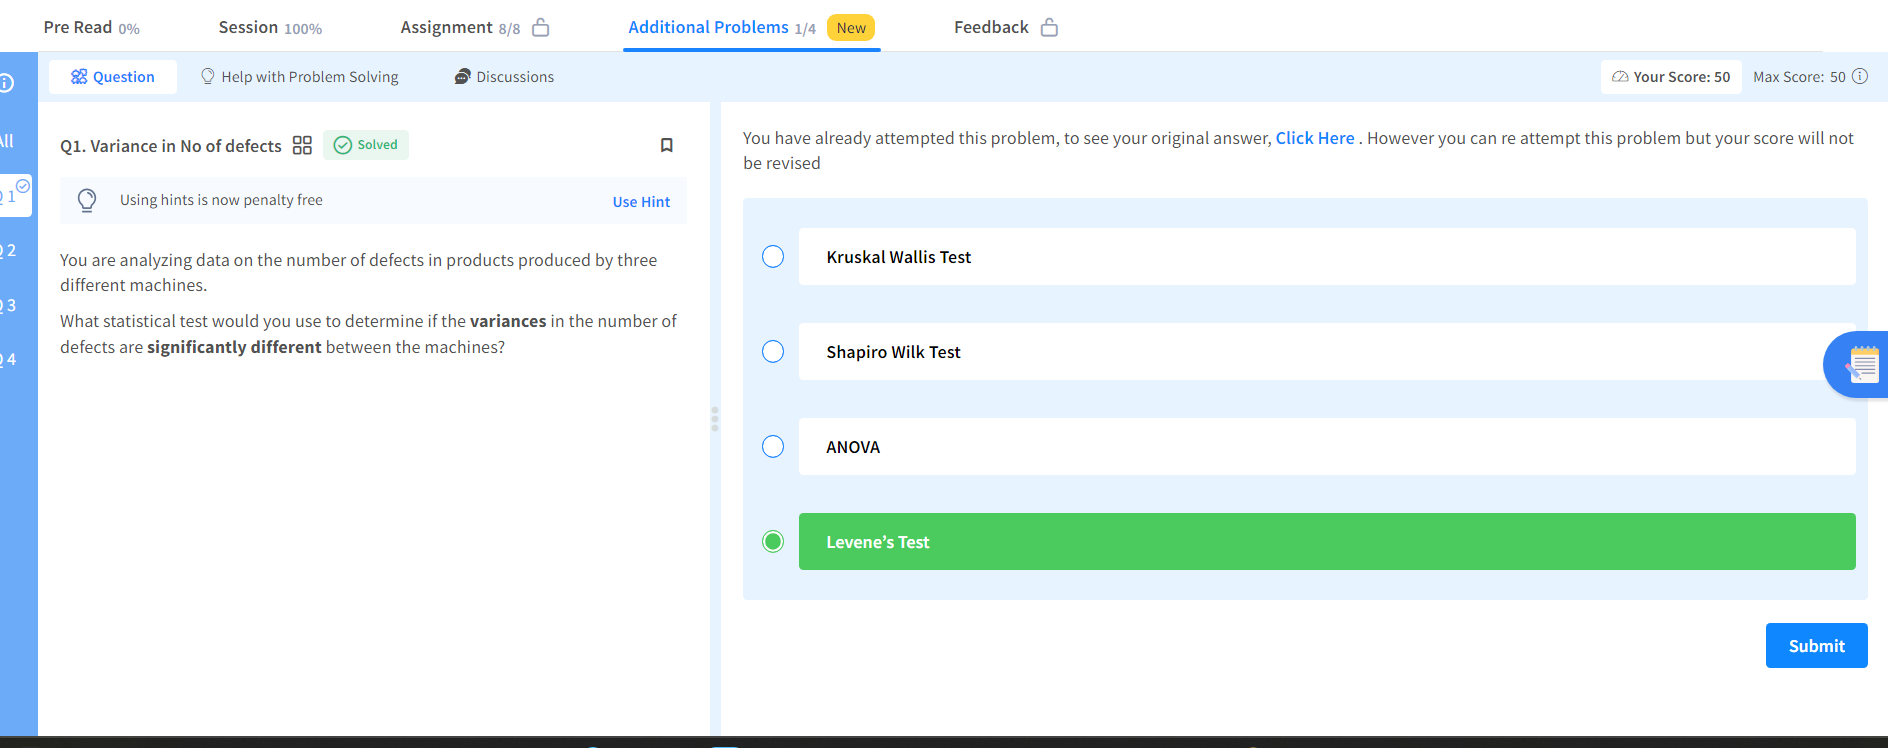

A pharmaceutical company conducted a clinical trial to test the effectiveness of three different drug treatments (Drug A, Drug B, and Drug C) on patients with a specific medical condition.

The trial measured the reduction in symptoms for each patient after treatment. The dataset consists of three groups, each representing one drug treatment, where each value represents the unit difference before and after taking the drugs.

drug_a = [8, 17, 16, 25, 17]
drug_b = [9, 8, 16, 7, 8]
drug_c = [7, 6, 5, 4, 6]

Conduct an appropriate test to assess overall differences with a 99% confidence level and, if significant, perform pairwise t-tests to identify which pairs of drug treatments exhibit significant differences in the reduction of symptoms.

In [34]:
drug_a = [8, 17, 16, 25, 17]
drug_b = [9, 8, 16, 7, 8]
drug_c = [7, 6, 5, 4, 6]

alpha=0.01

stat, pvalue_a = shapiro(drug_a)
# Shapiro-Wilk test for drug_a
stat, pvalue_b = shapiro(drug_b)
# Shapiro-Wilk test for drug_b
stat, pvalue_c = shapiro(drug_c)


print("Shaprio results:")
print("algorithm_A:", pvalue_a,"; Not normally distributed" if pvalue_a <= alpha else " ; Normally distributed")
print("algorithm_B:", pvalue_b,"; Not Normally distributed" if pvalue_b <= alpha else " ; Normally distributed")
print("algorithm_C:", pvalue_c,"; Not Normally distributed" if pvalue_c <= alpha else " ; Normally distributed")
print()

H0="No diff, ab "
H1="There is diff ab"

f_stat, p_value=ttest_ind(drug_a, drug_b)

if p_value<0.01: 
    print("reject H0", H1)
else: 
    print("Fail to reject H0", H0)

Shaprio results:
algorithm_A: 0.5120150446891785  ; Normally distributed
algorithm_B: 0.018361493945121765  ; Normally distributed
algorithm_C: 0.8139519691467285  ; Normally distributed

Fail to reject H0 No diff, ab 


In [35]:
H0="No diff, ac "
H1="There is diff ac"

f_stat, p_value=ttest_ind(drug_a, drug_c)

if p_value<0.01: 
    print("reject H0", H1)
else: 
    print("Fail to reject H0", H0)

reject H0 There is diff ac


In [36]:
H0="No diff, bc "
H1="There is diff bc"

f_stat, p_value=ttest_ind(drug_b, drug_c)

if p_value<0.01: 
    print("reject H0", H1)
else: 
    print("Fail to reject H0", H0)

Fail to reject H0 No diff, bc 


A Company wishes to test whether three sales persons Saurav, Naveen, and Radha make the same sales or they differ in their selling ability by comparing the average number of sales made by them last week.

Out of 14 sales 'Saurav' made 5, 'Naveen' made 4 and 'Radha' made 5. The following arrays describes the records of the sales persons in rupees.

Saurav = [300, 400, 300, 500, 50]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]

Test whether the average sales of the Saurav, Naveen, and Radha differ in size at a 95% confidence level.

In [41]:
Saurav = [300, 400, 300, 500, 50]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]
alpha=0.05

stat, pvalue_a = shapiro(Saurav)
# Shapiro-Wilk test for drug_a
stat, pvalue_b = shapiro(Naveen)
# Shapiro-Wilk test for drug_b
stat, pvalue_c = shapiro(Radha)


print("Shaprio results:")
print("Saurav:", pvalue_a,"; Not normally distributed" if pvalue_a <= alpha else " ; Normally distributed")
print("Naveen:", pvalue_b,"; Not Normally distributed" if pvalue_b <= alpha else " ; Normally distributed")
print("Radha:", pvalue_c,"; Not Normally distributed" if pvalue_c <= alpha else " ; Normally distributed")
print()


H0="Same Sales"
H1="Not Same Sales"

f_stat, p_value=f_oneway(Saurav, Naveen, Radha)
print(p_value)
if p_value<0.05: 
    print("reject H0", H1)
else: 
    print("Fail to reject H0", H0)

Shaprio results:
Saurav: 0.6155813932418823  ; Normally distributed
Naveen: 0.16119077801704407  ; Normally distributed
Radha: 0.9671739339828491  ; Normally distributed

0.20659122081429684
Fail to reject H0 Same Sales


The Highway Administration conducts an annual survey on motor vehicles travelling on the highway. They publish their findings in Highway Statistics, based on different types of vehicles.
Independent simple random samples of cars, buses, and trucks yielded the data on a number of thousand miles driven last year.

cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

We want to decide if there is a difference in last year’s mean number of miles driven among cars, buses, and trucks.

At a 93% confidence level, does the data provide sufficient evidence to conclude that there is a difference in last year’s mean number of miles driven by cars, buses, and trucks?

Choose the correct option below :

In [49]:
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]
alpha=0.07

H0="Gausian"
H1="Not Gausian"

stata, p_valuea=shapiro(cars)
statb, p_valueb=shapiro(buses)
statc, p_valuec=shapiro(trucks)

if p_valuea<alpha: 
    print(H1)
else: 
    print(H0)
    
if p_valueb<alpha: 
    print(H1)
else: 
    print(H0)

if p_valuec<alpha: 
    print(H1)
else: 
    print(H0)

Lh0="Var are equal"
Lh1="Var are not equal"

lstat, pvalue_levene=levene(cars, buses, trucks)

print(pvalue_levene)
if p_valuec<alpha: 
    print(Lh1)
else: 
    print(Lh0)
    
print("we need to do kruskal test")

k_stat, p_value_k=kruskal(cars, buses, trucks)

H0K="Mean no. of miles driven on the highway, by the different vehicle types was same in the last year"
H0K1="Mean no. of miles driven on the highway, by the different vehicle types was diff in the last year"

print("kruskal p", p_value_k)
if p_value_k<alpha: 
    print(H0K1)
else: 
    print(H0K)
    

Gausian
Gausian
Not Gausian
0.5882526059688644
Var are not equal
we need to do kruskal test
kruskal p 0.08226664751547799
Mean no. of miles driven on the highway, by the different vehicle types was same in the last year


In [50]:
from scipy.stats import f_oneway

cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

test_statistic, p_value = f_oneway(cars, buses, trucks)
print("p_value:",p_value)

alpha = 0.07
if  p_value < alpha:
    print("Reject H0; Mean no. of miles driven on the highway, by the different vehicle types was different in the last year")
else:
    print("Fail to reject H0; Mean no. of miles driven on the highway, by the different vehicle types was same in the last year")

p_value: 0.10782985675757563
Fail to reject H0; Mean no. of miles driven on the highway, by the different vehicle types was same in the last year
